#  Case Study APA
## GOPIKRISHNAN C P
### CB.EN.P2AID20020
#### AID 

# MARKET BASKET ANALYSIS:

In [1]:
!pip install apyori

You should consider upgrading via the 'c:\users\gopikrishnan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/Groceries_dataset.csv')

In [4]:
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


preprocessing grocerry data

In [5]:
df.shape

(38765, 3)

In [6]:
!pip install efficient-apriori

You should consider upgrading via the 'c:\users\gopikrishnan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [7]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [8]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [9]:
df.set_index('Date',inplace = True)

In [10]:
df.index=pd.to_datetime(df.index)

In [11]:
df.head(10)

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
2015-02-14,4941,rolls/buns
2015-08-05,4501,other vegetables
2015-12-23,3803,pot plants
2015-03-20,2762,whole milk


In [12]:
#gathering information about products
total_item = len(df)
total_days = len(np.unique(df.index.date))
total_months = len(np.unique(df.index.year))
print(total_item,total_days,total_months)

38765 728 2


38765 items sold in 728 days and 24 months

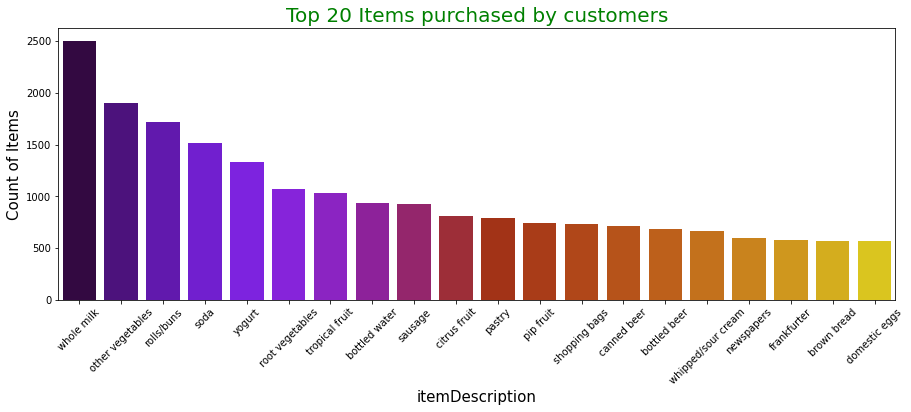

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.itemDescription.value_counts().head(20).index, y = df.itemDescription.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('itemDescription', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [14]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
make up remover             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

In [15]:
#grouping to form a list of products bought by same customer on same date
df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))

In [16]:
df.head(10)

Member_number  Date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
1001           2014-07-02                    [sausage, whole milk, rolls/buns]
               2014-12-12                                   [whole milk, soda]
               2015-01-20              [frankfurter, soda, whipped/sour cream]
               2015-02-05                                  [frankfurter, curd]
               2015-04-14                                  [beef, white bread]
Name: itemDescription, dtype: object

In [17]:
transactions = df.values.tolist()
transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

In [18]:
pip install mlxtend

You should consider upgrading via the 'c:\users\gopikrishnan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [19]:

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df1 = pd.DataFrame(te_ary, columns=te.columns_)
df1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from mlxtend.frequent_patterns import apriori
apriori(df1, min_support=0.09)

,support,itemsets
0,0.122101,(102)
1,0.110005,(122)
2,0.097106,(138)
3,0.157923,(164)


In [21]:
apriori(df1, min_support=0.09, use_colnames=True)

,support,itemsets
0,0.122101,(other vegetables)
1,0.110005,(rolls/buns)
2,0.097106,(soda)
3,0.157923,(whole milk)


In [22]:
frequent_itemsets = apriori(df1, min_support=0.09, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.122101,(other vegetables),1
1,0.110005,(rolls/buns),1
2,0.097106,(soda),1
3,0.157923,(whole milk),1


In [23]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
(frequent_itemsets['support'] >= 0.15) ]

,support,itemsets,length
3,0.157923,(whole milk),1


In [24]:
from apyori import apriori
rules = apriori(transactions, min_support=0.00030,min_confidence = 0.05,min_lift = 2,min_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({'soda', 'artif. sweetener'}), support=0.00046782062420637575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'soda'}), confidence=0.2413793103448276, lift=2.4857251346797353)]),
 RelationRecord(items=frozenset({'berries', 'condensed milk'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'condensed milk'}), items_add=frozenset({'berries'}), confidence=0.05102040816326531, lift=2.34177413296607)]),
 RelationRecord(items=frozenset({'brandy', 'whole milk'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)]),
 RelationRecord(items=frozenset({'sweet spreads', 'butter'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sweet spreads'}), items_add=frozenset({'butter'}), confid

In [25]:
from efficient_apriori import apriori

In [26]:
itemsets, rules = apriori(transactions, min_support=0.09,  min_confidence=0.7)

In [27]:
rules

[]

In [28]:
itemsets

{1: {('whole milk',): 2363,
  ('soda',): 1453,
  ('rolls/buns',): 1646,
  ('other vegetables',): 1827}}

In [29]:
len(results)

104

In [30]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [31]:
ordered_results

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,artif. sweetener,soda,0.000468,0.241379,2.485725
1,condensed milk,berries,0.000334,0.051020,2.341774
2,brandy,whole milk,0.000869,0.342105,2.166281
3,sweet spreads,butter,0.000334,0.073529,2.087705
4,liver loaf,canned beer,0.000401,0.120000,2.557778
...,...,...,...,...,...
99,rolls/buns,yogurt,0.000601,0.204545,2.381800
100,shopping bags,yogurt,0.000401,0.206897,2.409178
101,whole milk,sausage,0.001470,0.131737,2.182917
102,pastry,soda,0.000334,0.090909,7.817659


# k means and hierarchical clustering

In [32]:
co=pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/covid_19_india.csv')

In [33]:
co.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
5,6,04/02/20,6:00 PM,Kerala,3,0,0,0,3
6,7,05/02/20,6:00 PM,Kerala,3,0,0,0,3
7,8,06/02/20,6:00 PM,Kerala,3,0,0,0,3
8,9,07/02/20,6:00 PM,Kerala,3,0,0,0,3
9,10,08/02/20,6:00 PM,Kerala,3,0,0,0,3


In [34]:
dates = pd.to_datetime(co['Date']).sort_values()
dates = dates.unique()
start_date = dates[0]
end_date = dates[-1]
print("Start date: ", start_date)
print("End Date: ", end_date)
date_range = pd.date_range(start_date, end_date).values

Start date:  2020-01-02T00:00:00.000000000
End Date:  2020-12-09T00:00:00.000000000


In [35]:
co_uniq=co['State/UnionTerritory'].unique()

In [36]:
co_uniq

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***'], dtype=object)

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Confirmed', ylabel='Density'>

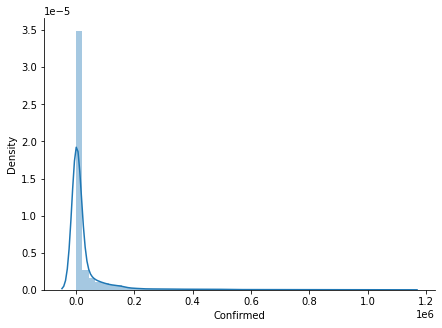

In [37]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(co['Confirmed'])

In [38]:
co.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

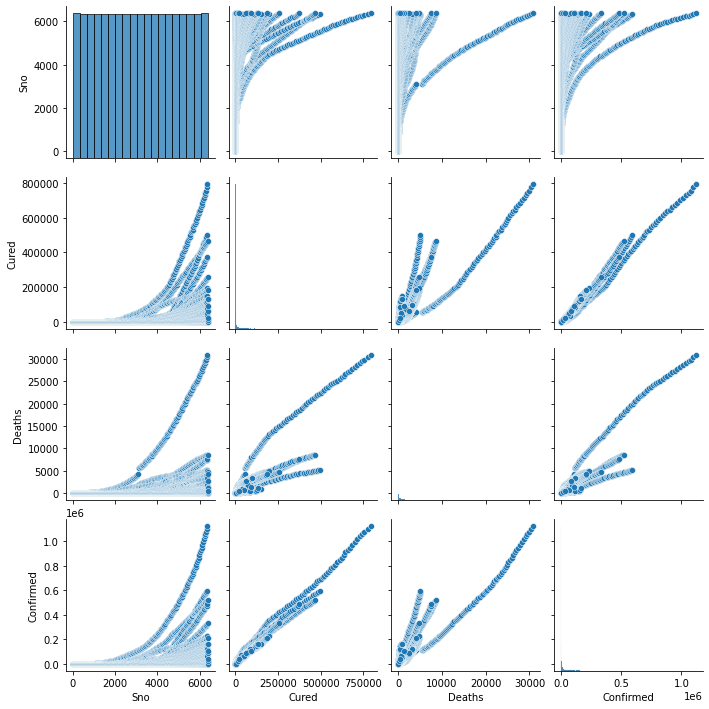

In [39]:
sns.pairplot(co)

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [41]:
km_df = KMeans(n_clusters=4)
km_df

KMeans(n_clusters=4)

In [42]:
co['Date'] = pd.to_datetime(co['Date'])
co.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [43]:
co['Year'] = co.Date.dt.year
co['Month'] = co.Date.dt.month
co['Day'] = co.Date.dt.day
co.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month,Day
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020,1,30
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,1,31
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2,2020,1,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020,2,2
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3,2020,3,2


In [44]:
co.drop('Date',axis=1)

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month,Day
0,1,6:00 PM,Kerala,1,0,0,0,1,2020,1,30
1,2,6:00 PM,Kerala,1,0,0,0,1,2020,1,31
2,3,6:00 PM,Kerala,2,0,0,0,2,2020,1,2
3,4,6:00 PM,Kerala,3,0,0,0,3,2020,2,2
4,5,6:00 PM,Kerala,3,0,0,0,3,2020,3,2
...,...,...,...,...,...,...,...,...,...,...,...
6381,6382,8:00 AM,Telengana,-,-,133555,1005,165003,2020,9,17
6382,6383,8:00 AM,Tripura,-,-,12956,222,20676,2020,9,17
6383,6384,8:00 AM,Uttarakhand,-,-,24432,447,35947,2020,9,17
6384,6385,8:00 AM,Uttar Pradesh,-,-,258573,4690,330265,2020,9,17


In [45]:
y_predicted = km_df.fit_predict(co[['Day','Confirmed']])
y_predicted

array([0, 0, 0, ..., 0, 2, 3])

In [46]:
clusters=np.unique(y_predicted)

In [47]:
clusters

array([0, 1, 2, 3])

In [48]:
co['Cluster']=y_predicted

In [49]:
co.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month,Day,Cluster
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020,1,30,0
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,1,31,0
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2,2020,1,2,0
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020,2,2,0
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3,2020,3,2,0


In [50]:
km_df.cluster_centers_

array([[1.55491876e+01, 7.06419621e+03],
       [1.68620690e+01, 8.47810310e+05],
       [1.58246753e+01, 3.98623299e+05],
       [1.54468439e+01, 1.25356782e+05]])

No handles with labels found to put in legend.


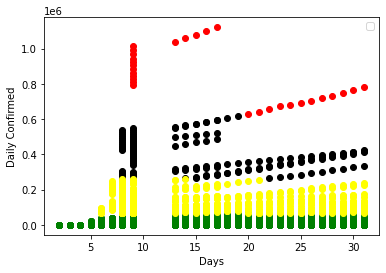

In [51]:
df11 = co[co.Cluster==0]
df22 = co[co.Cluster==1]
df33 = co[co.Cluster==2]
df44 = co[co.Cluster==3]

plt.scatter(df11.Day,df11['Confirmed'],color='green')
plt.scatter(df22.Day,df22['Confirmed'],color='red')
plt.scatter(df33.Day,df33['Confirmed'],color='black')
plt.scatter(df44.Day,df44['Confirmed'],color='yellow')


plt.xlabel('Days')
plt.ylabel('Daily Confirmed')
plt.legend()

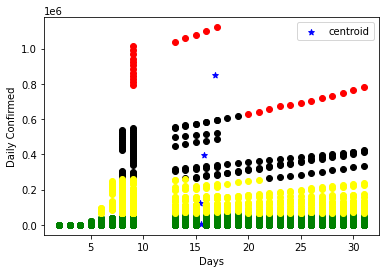

In [52]:
plt.scatter(km_df.cluster_centers_[:,0],km_df.cluster_centers_[:,1],color='blue',marker='*',label='centroid')
plt.scatter(df11.Day,df11['Confirmed'],color='green')
plt.scatter(df22.Day,df22['Confirmed'],color='red')
plt.scatter(df33.Day,df33['Confirmed'],color='black')
plt.scatter(df44.Day,df44['Confirmed'],color='yellow')


plt.xlabel('Days')
plt.ylabel('Daily Confirmed')
plt.legend()

In [53]:
sse = []
range1 = range(1,10)
for k in range1:
    km = KMeans(n_clusters=k)
    km.fit(co[['Day','Confirmed']])
    sse.append(km.inertia_)

In [54]:
sse

[52989161077226.63,
 16631246110189.684,
 8380099084031.525,
 4261125759785.528,
 2777106071354.716,
 1877720458182.6494,
 1430898912173.3274,
 1085271044151.4784,
 847477671441.5924]

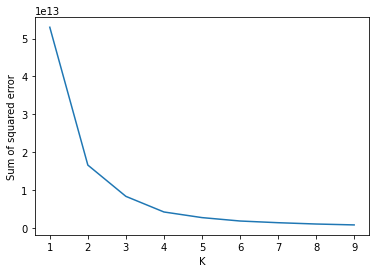

In [55]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range1,sse)

In [56]:

import scipy.cluster.hierarchy as sch


In [57]:
df_co = pd.DataFrame(co,columns = ['Day','Confirmed','State/UnionTerritory'])
df_co.head()
df_co.shape

(6386, 3)

In [58]:
df_co = df_co[df_co['State/UnionTerritory']== 'Kerala']

In [59]:
df_co.head()
df_co.shape

(232, 3)

In [60]:
df_co=df_co.drop(columns=['State/UnionTerritory'],axis=1)

Text(0, 0.5, 'Euclidean distance in the space with other variables')

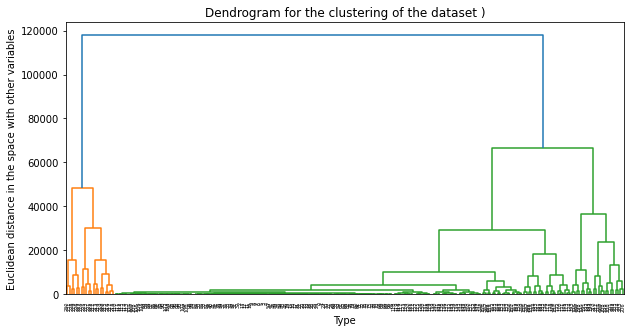

In [61]:
c = sch.linkage(df_co, method = 'complete')
plt.figure(figsize=(10,5))
den = sch.dendrogram(c)
plt.title('Dendrogram for the clustering of the dataset )')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

# hopkins test

In [62]:
hop = pd.DataFrame(co,columns = ['Deaths','Confirmed','Cured','Month'])

In [63]:

!pip  install pyclustertend --user

You should consider upgrading via the 'c:\users\gopikrishnan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [64]:
from sklearn.preprocessing import scale

In [65]:
hop.head()

,Deaths,Confirmed,Cured,Month
0,0,1,0,1
1,0,1,0,1
2,0,2,0,1
3,0,3,0,2
4,0,3,0,3


In [66]:
hop_x=hop.values

In [67]:
type(hop_x)

numpy.ndarray

In [68]:
hop_x[0:8]

array([[0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 2, 0, 1],
       [0, 3, 0, 2],
       [0, 3, 0, 3],
       [0, 3, 0, 4],
       [0, 3, 0, 5],
       [0, 3, 0, 6]], dtype=int64)

In [69]:
from pyclustertend import hopkins
hopkins(hop_x,hop.shape[0])

0.0033228295151480477

In [70]:
Y= scale(hop_x)

In [71]:
Y[0:9]

array([[-0.26965644, -0.3455309 , -0.33199089, -1.97795359],
       [-0.26965644, -0.3455309 , -0.33199089, -1.97795359],
       [-0.26965644, -0.34551992, -0.33199089, -1.97795359],
       [-0.26965644, -0.34550894, -0.33199089, -1.59306689],
       [-0.26965644, -0.34550894, -0.33199089, -1.2081802 ],
       [-0.26965644, -0.34550894, -0.33199089, -0.8232935 ],
       [-0.26965644, -0.34550894, -0.33199089, -0.4384068 ],
       [-0.26965644, -0.34550894, -0.33199089, -0.0535201 ],
       [-0.26965644, -0.34550894, -0.33199089,  0.33136659]])

In [72]:
hopkins(Y,hop.shape[0])

0.007379081255535077

#  TIME SERIES ANALYSIS:

In [73]:
#dataset consist of electricity  production
elec=pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/Electric_Production.csv')

In [74]:
elec.head(10)

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
5,06-01-1985,58.0904
6,07-01-1985,62.6202
7,08-01-1985,63.2485
8,09-01-1985,60.5846
9,10-01-1985,56.3154


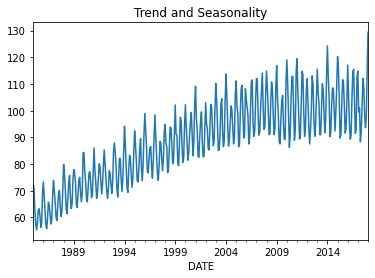

In [75]:
df1=pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/Electric_Production.csv', parse_dates=['DATE'], index_col='DATE').plot(title='Trend and Seasonality', legend=False)

In [76]:
elec.shape

(397, 2)

In [77]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [78]:
elec.Value.isnull().sum()

0

<AxesSubplot:xlabel='DATE'>

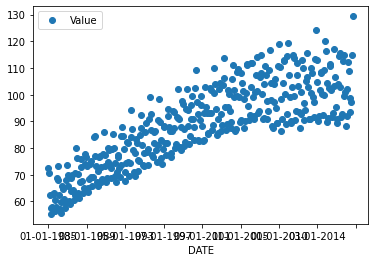

In [79]:
elec.plot(x='DATE', y='Value', style='o')

In [80]:
df2=elec[['Value']]

In [81]:
df2.head(10)

,Value
0,72.5052
1,70.6720
2,62.4502
3,57.4714
4,55.3151
5,58.0904
6,62.6202
7,63.2485
8,60.5846
9,56.3154


In [82]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(elec.Value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.256990
p-value: 0.186215


In [83]:
result

(-2.25699035004725,
 0.18621469116586592,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

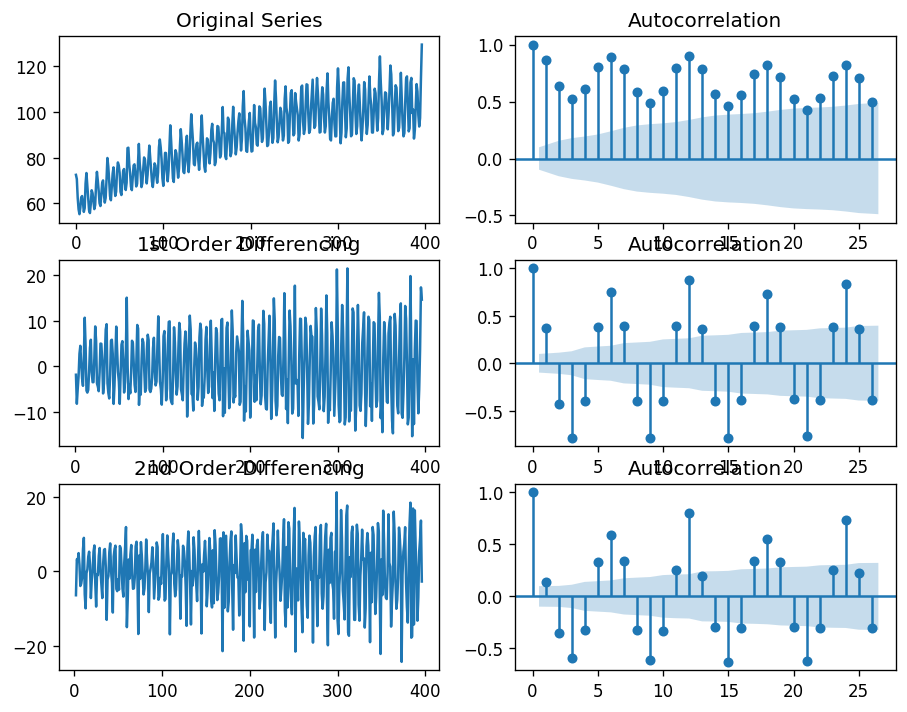

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df2.Value); axes[0, 0].set_title('Original Series')
plot_acf(df2.Value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df2.Value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df2.Value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df2.Value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df2.Value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [85]:
#diff1

result = adfuller(df2.Value.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.104891
p-value: 0.000000


In [86]:
#diff2
result = adfuller(df2.Value.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.863042
p-value: 0.000000


### AR AND MA

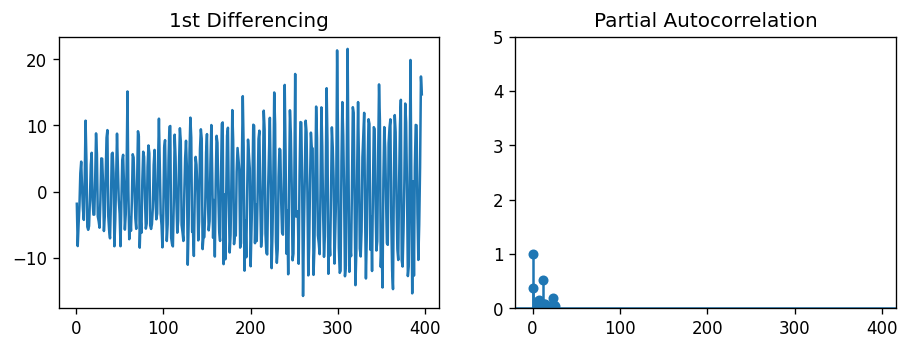

In [87]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2.Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df2.Value.diff().dropna(), ax=axes[1])

plt.show()

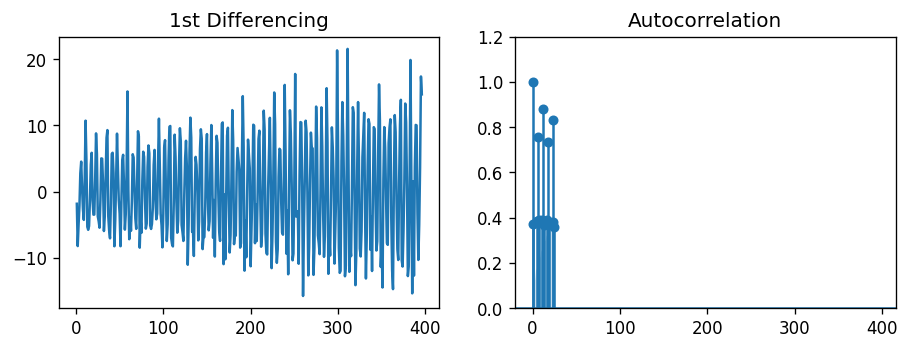

In [88]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2.Value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df2.Value.diff().dropna(), ax=axes[1])

plt.show()

# ARIMA TEST

In [89]:
#1,1,1ARIMA MODEL
model = ARIMA(df2.Value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarni

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  396
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1327.994
Method:                       css-mle   S.D. of innovations              6.904
Date:                Mon, 14 Jun 2021   AIC                           2663.989
Time:                        22:57:57   BIC                           2679.914
Sample:                             1   HQIC                          2670.298
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1108      0.020      5.607      0.000       0.072       0.149
ar.L1.D.Value     0.5414      0.045     11.919      0.000       0.452       0.630
ma.L1.D.Value    -0.9767      0.010   -1

In [90]:
model = ARIMA(df2.Value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  396
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1241.559
Method:                       css-mle   S.D. of innovations              5.547
Date:                Mon, 14 Jun 2021   AIC                           2493.119
Time:                        22:57:57   BIC                           2513.026
Sample:                             1   HQIC                          2501.005
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1108      0.020      5.589      0.000       0.072       0.150
ar.L1.D.Value     0.3401      0.055      6.182      0.000       0.232       0.448
ma.L1.D.Value    -0.2914      0.034     

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


#### RESIDUAL ERROR

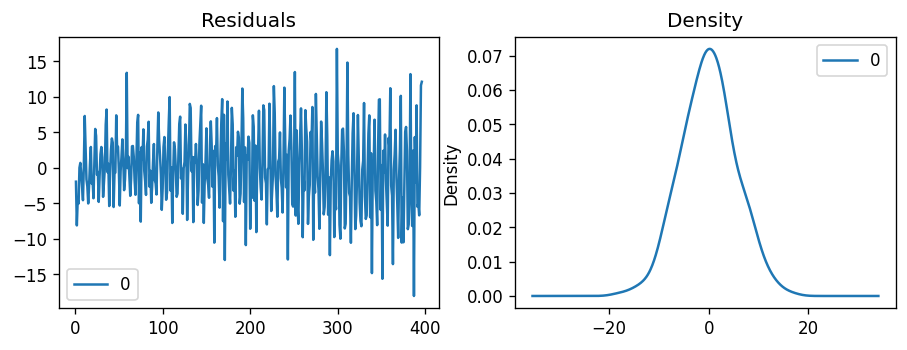

In [91]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

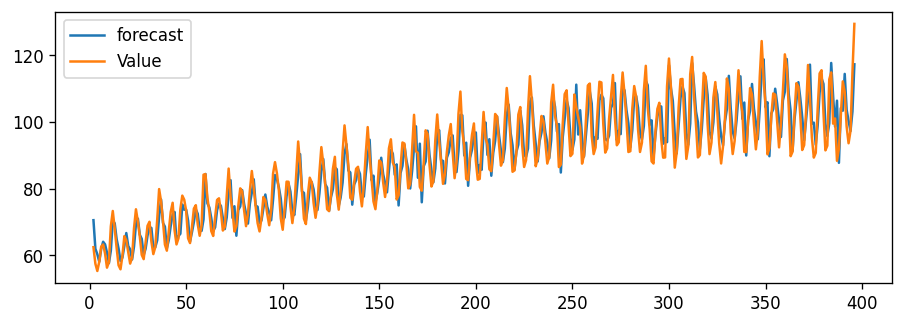

In [92]:
model_fit.plot_predict(dynamic=False)
plt.show()

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarni

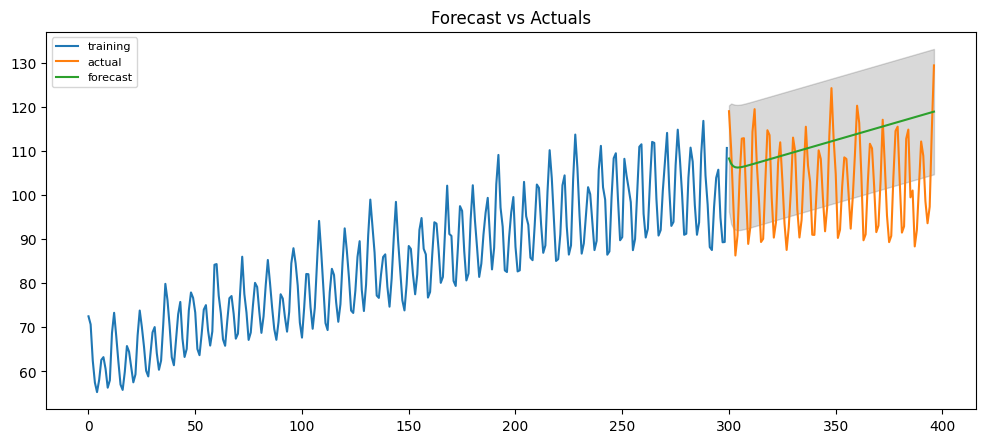

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:655: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.12204557223611531,
 'me': 9.63634488007796,
 'mae': 11.807204973104389,
 'mpe': 0.10362646726512265,
 'rmse': 14.116826934878421,
 'acf1': 0.5277727027081158,
 'corr': 0.0645759827762651,
 'minmax': 0.10404725258623482}

In [93]:
# Create Training and Test
train = df2.Value[:300]
test = df2.Value[300:]
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(97, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

In [94]:
import pmdarima as pm
model_arima= pm.auto_arima(df2.Value,trace=True, error_action='ignore', test='adf',start_p=1,start_q=1,max_p=6,max_q=6,d=None,
                   suppress_warnings=True,stepwise=False,seasonal=False)
print(model_arima.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4702.955, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4185.795, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=1.51 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=1.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2635.437, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2551.745, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2474.523, Time=0.31 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2455.204, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2636.347, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2517.847, Time=0.40 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2474.151, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AI

In [95]:
model = pm.auto_arima(df2.Value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2635.437, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4702.955, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4185.795, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2636.347, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2551.745, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2517.847, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2120.789, Time=0.75 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2263.821, Time=0.62 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=2263.034, Time=0.63 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2613.564, Time=0.97 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2474.151, Time=0.59 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2242.939, Time=0.26 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=i

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


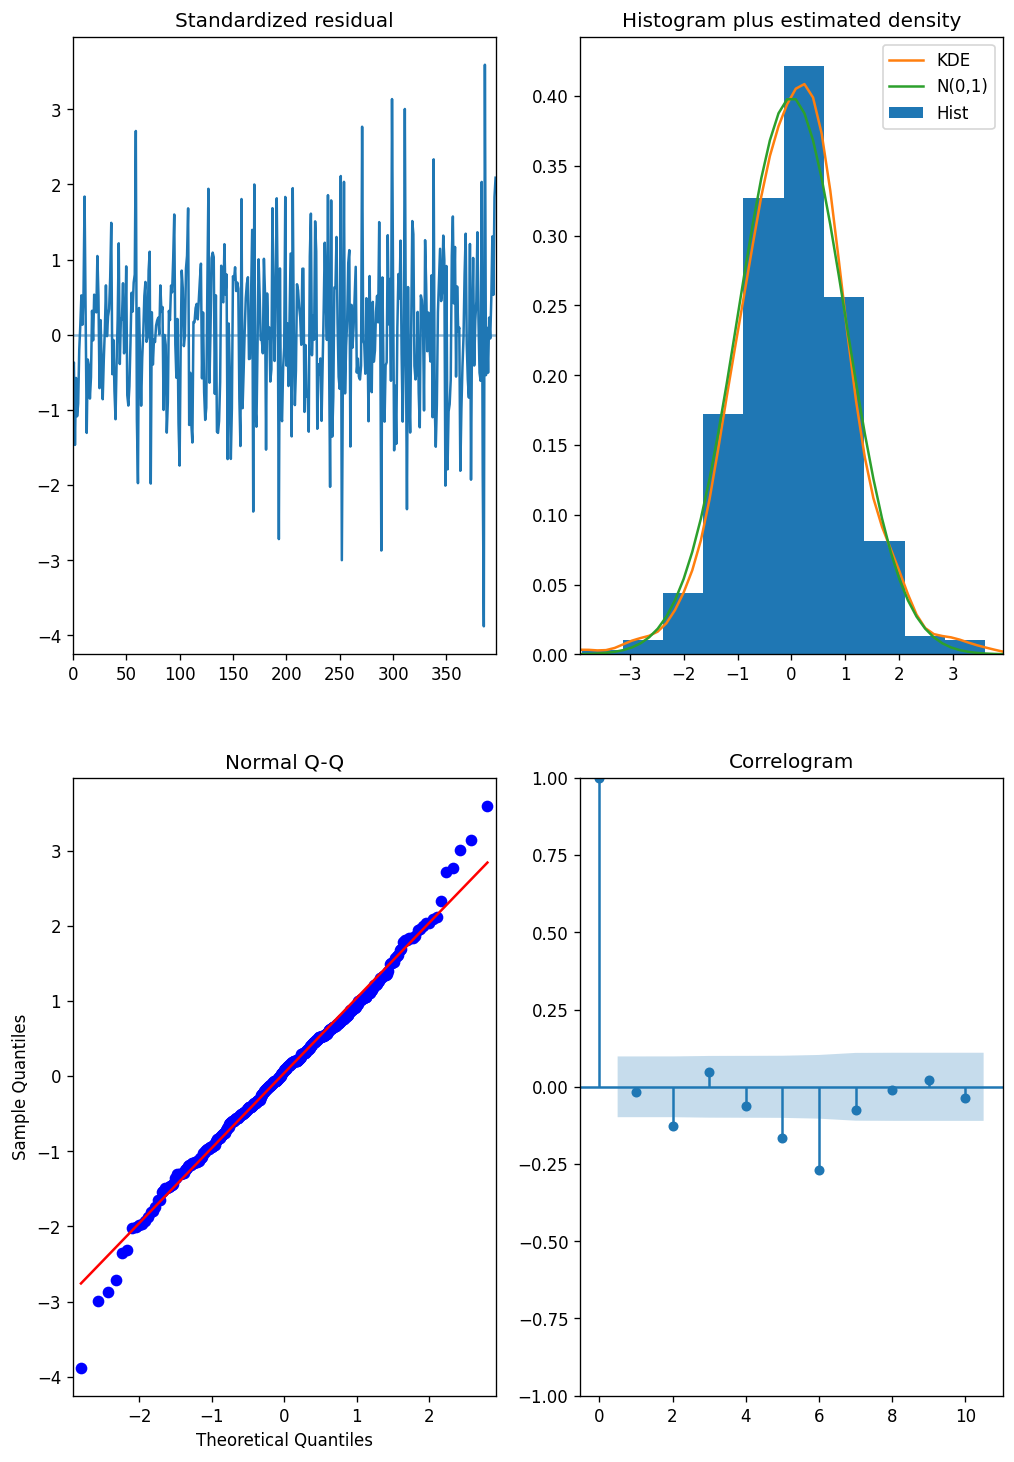

In [96]:
model.plot_diagnostics(figsize=(10,15))
plt.show()

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversion

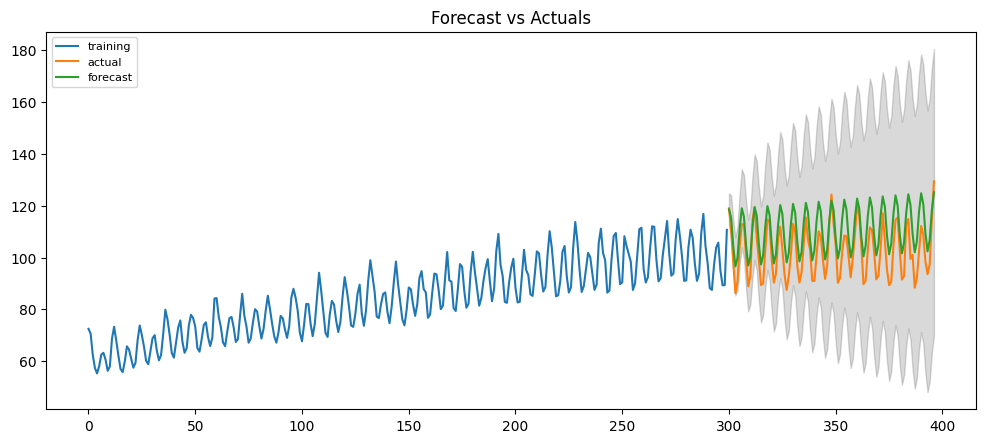

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:655: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.08441182964091828,
 'me': 8.212384007294105,
 'mae': 8.412590177147875,
 'mpe': 0.08278571103444876,
 'rmse': 9.238045585290305,
 'acf1': 0.4897655788457581,
 'corr': 0.904509193758655,
 'minmax': 0.07656191228866627}

In [97]:
# Create Training and Test
train = df2.Value[:300]
test = df2.Value[300:]
model = ARIMA(train, order=(2, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(97, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

# TEXT MINNING :GOOGLE  USER REVIEW

Step Involved
1.Read Data
2.PreProcess Data
3.Stopwords
4.Lemmatazation

In [98]:
import numpy as np 
import pandas as pd 
import os
df4=pd.read_csv("https://raw.githubusercontent.com/Gopikrishnan96/master/main/googleplaystore_user_reviews.csv",encoding="latin1")

In [99]:
df4.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [100]:
df4=pd.concat([df4.Translated_Review,df4.Sentiment],axis=1)
df4.dropna(axis=0,inplace=True)  # For drop nan values. It makes confuse for our model.
df4.tail()

,Translated_Review,Sentiment
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive
64230,"Useless app, I searched flats kondapur, Hydera...",Negative


In [101]:
df4.Sentiment.unique() 

array(['Positive', 'Neutral', 'Negative'], dtype=object)

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Sentiments')

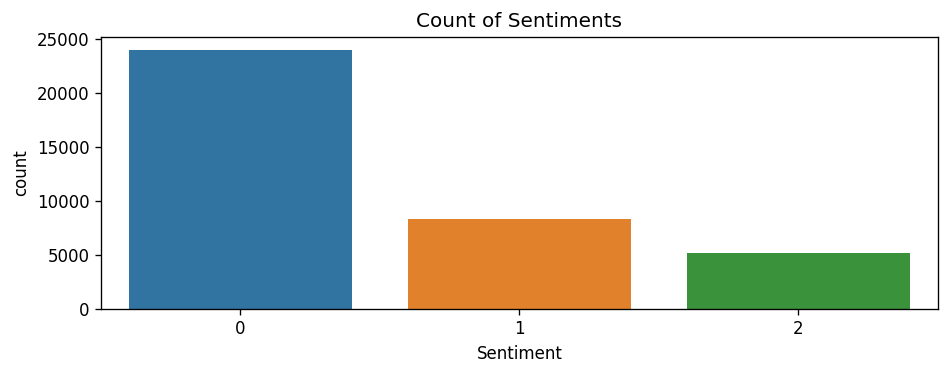

In [102]:
df4.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in df4.Sentiment]

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df4.Sentiment)
plt.title("Count of Sentiments")

In [103]:
df4.Sentiment.value_counts()

0    23998
1     8271
2     5158
Name: Sentiment, dtype: int64

In [104]:
import re ## Regular expression for deleting characters which are not letters.
first_sample = df4.Translated_Review[9] 
sample = re.sub("[^a-zA-Z]"," ",first_sample)
sample = sample.lower()
print("[{}] convert to \n[{}]".format(df4.Translated_Review[9],sample))

[It helpful site ! It help foods get !] convert to 
[it helpful site   it help foods get  ]


In [105]:
import nltk  ## Natural Language Tool Kit
from nltk.corpus import stopwords 

sample=nltk.word_tokenize(sample)
print(sample)

['it', 'helpful', 'site', 'it', 'help', 'foods', 'get']


In [106]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\gopikrishnan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [107]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gopikrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopikrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gopikrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [108]:
sample = [word for word in sample if not word in set(stopwords.words("english"))]
print(sample) 

['helpful', 'site', 'help', 'foods', 'get']


In [109]:
lemma = nltk.WordNetLemmatizer()  ##We have already imported nltk.
sample = [ lemma.lemmatize(word) for word in sample]
sample = " ".join(sample)

In [111]:
text_list=[]
for i in df4.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nltk.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [112]:
text_list[:5]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way']

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=1000
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" you can add but we have already applied it.
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names()
print("Most used 50 words: ",all_words[0:50])

Most used 50 words:  ['ability', 'able', 'about', 'absolutely', 'access', 'account', 'accurate', 'across', 'action', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'addicting', 'addictive', 'adding', 'advert', 'advertisement', 'after', 'again', 'age', 'ago', 'alarm', 'alert', 'all', 'allow', 'allows', 'almost', 'along', 'alot', 'already', 'also', 'although', 'always', 'am', 'amazing', 'amazon', 'amount', 'an', 'and', 'android', 'anime', 'annoying', 'another', 'answer', 'any', 'anymore']


# apply Naive Bayes

In [114]:
y = df4.iloc[:,1].values
x= sparce_matrix

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [115]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.5903018968741651


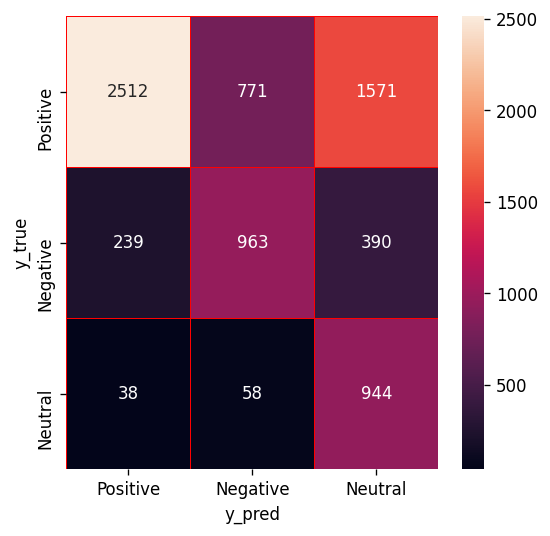

In [116]:
y_pred=nb.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

#  RandomForest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.8936681806037937


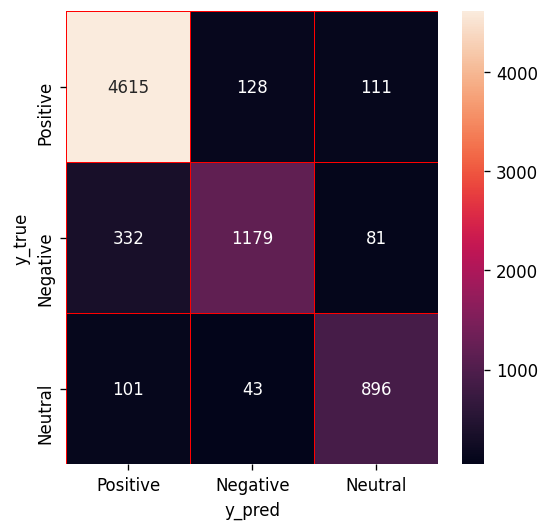

In [118]:
y_pred=rf.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

89% is good score

# Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
print("Logistic Regression accuracy: ",lr.score(xtest,ytest))

Logistic Regression accuracy:  0.8980764092973551


c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


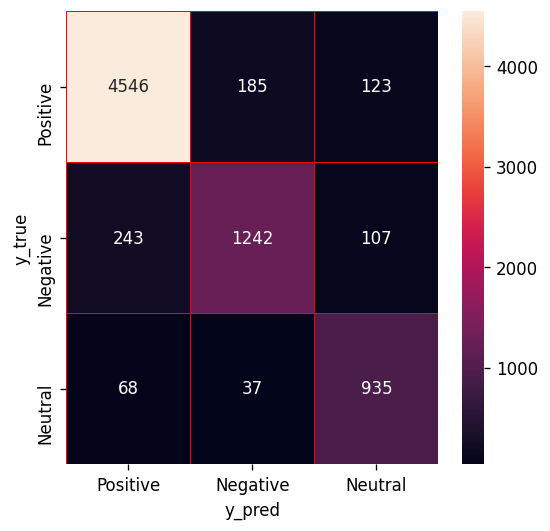

In [120]:
y_pred=lr.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

89.8%